<a href="https://colab.research.google.com/github/agentzoro/Marketing-Campaign-for-Banking-Products/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**

## **Context:**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


## **Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing XLSX data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


**Reading Datas**

In [ ]:
import io
Bank_data = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))

# Displaying top 5 rows
Bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Displaying bottom rows
Bank_data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Inspecting above data**

In [ ]:
# Checking shape of the dataset
Bank_data.shape

(5000, 14)

In [ ]:
# Checking datatypes
Bank_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

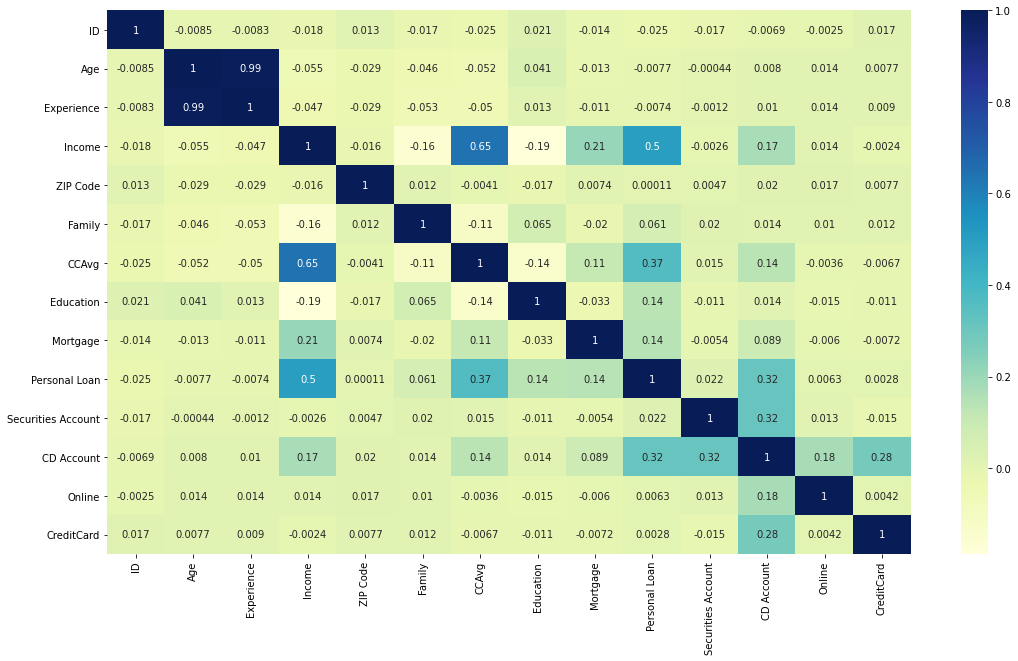

In [ ]:
Bank_Cor = Bank_data.corr()
plt.subplots(figsize = (18,10))
sns.heatmap(Bank_Cor,cmap="YlGnBu", annot=True)

In [ ]:
# Getting statistical summary
Bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Checking if any null value is present
Bank_data.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Print the total no of null values in each coloumn
Bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Print NO of unique data in each coloumn**

In [ ]:
Bank_data.groupby(['ID', 'Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']).count()

,,,,,,,,,,,,,
ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


**Print number of people with zero mortgage**

In [ ]:
(Bank_data['Mortgage'] == 0).sum()

3462

**Print number of people with zero credit card spending per month**

In [ ]:
(Bank_data['CreditCard'] == 0).sum()

3530

**Print** **number** **of** **people** **taken** **Personal** **Loans**

In [ ]:
(Bank_data['Personal Loan'] != 0).sum()

480

**Print value counts of all categorical columns**

In [ ]:
Bank_data.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

# **Univariate and Bivariate analysis**

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


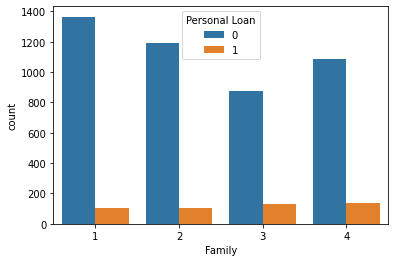

In [ ]:
# Analysis of Family
print(pd.pivot_table(data=Bank_data,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=Bank_data,hue='Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


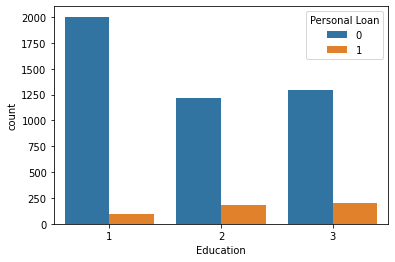

In [ ]:
# Analysis of Education
print(pd.pivot_table(data=Bank_data,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=Bank_data,hue='Personal Loan')

0    4520
1     480
Name: Personal Loan, dtype: int64


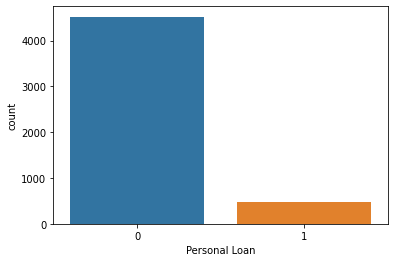

In [ ]:
# Analysis of Personal Loan
print(Bank_data['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=Bank_data)

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


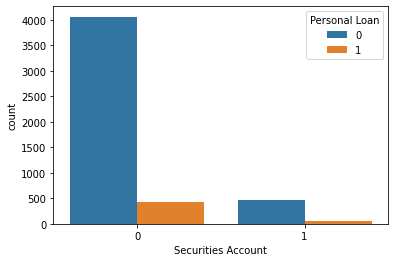

In [ ]:
# Analysis of Securities Account
print(pd.pivot_table(data=Bank_data,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=Bank_data,hue='Personal Loan')

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


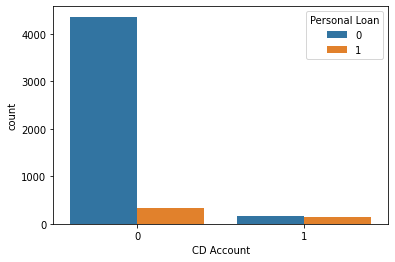

In [ ]:
# Analysis of CD Account
print(pd.pivot_table(data=Bank_data,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=Bank_data,hue='Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


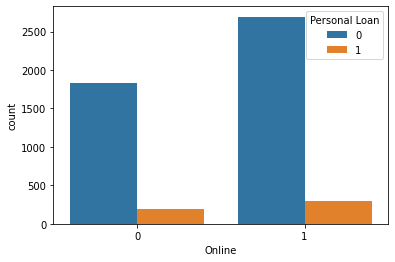

In [ ]:
# Analysis of Online
print(pd.pivot_table(data=Bank_data,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=Bank_data,hue='Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


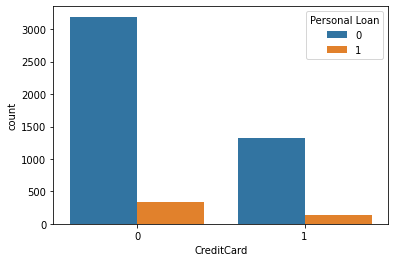

In [ ]:
# Analysis of Credit Card
print(pd.pivot_table(data=Bank_data,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=Bank_data,hue='Personal Loan')

In [ ]:
Bank_data = Bank_data.drop(['ID'],axis=1)

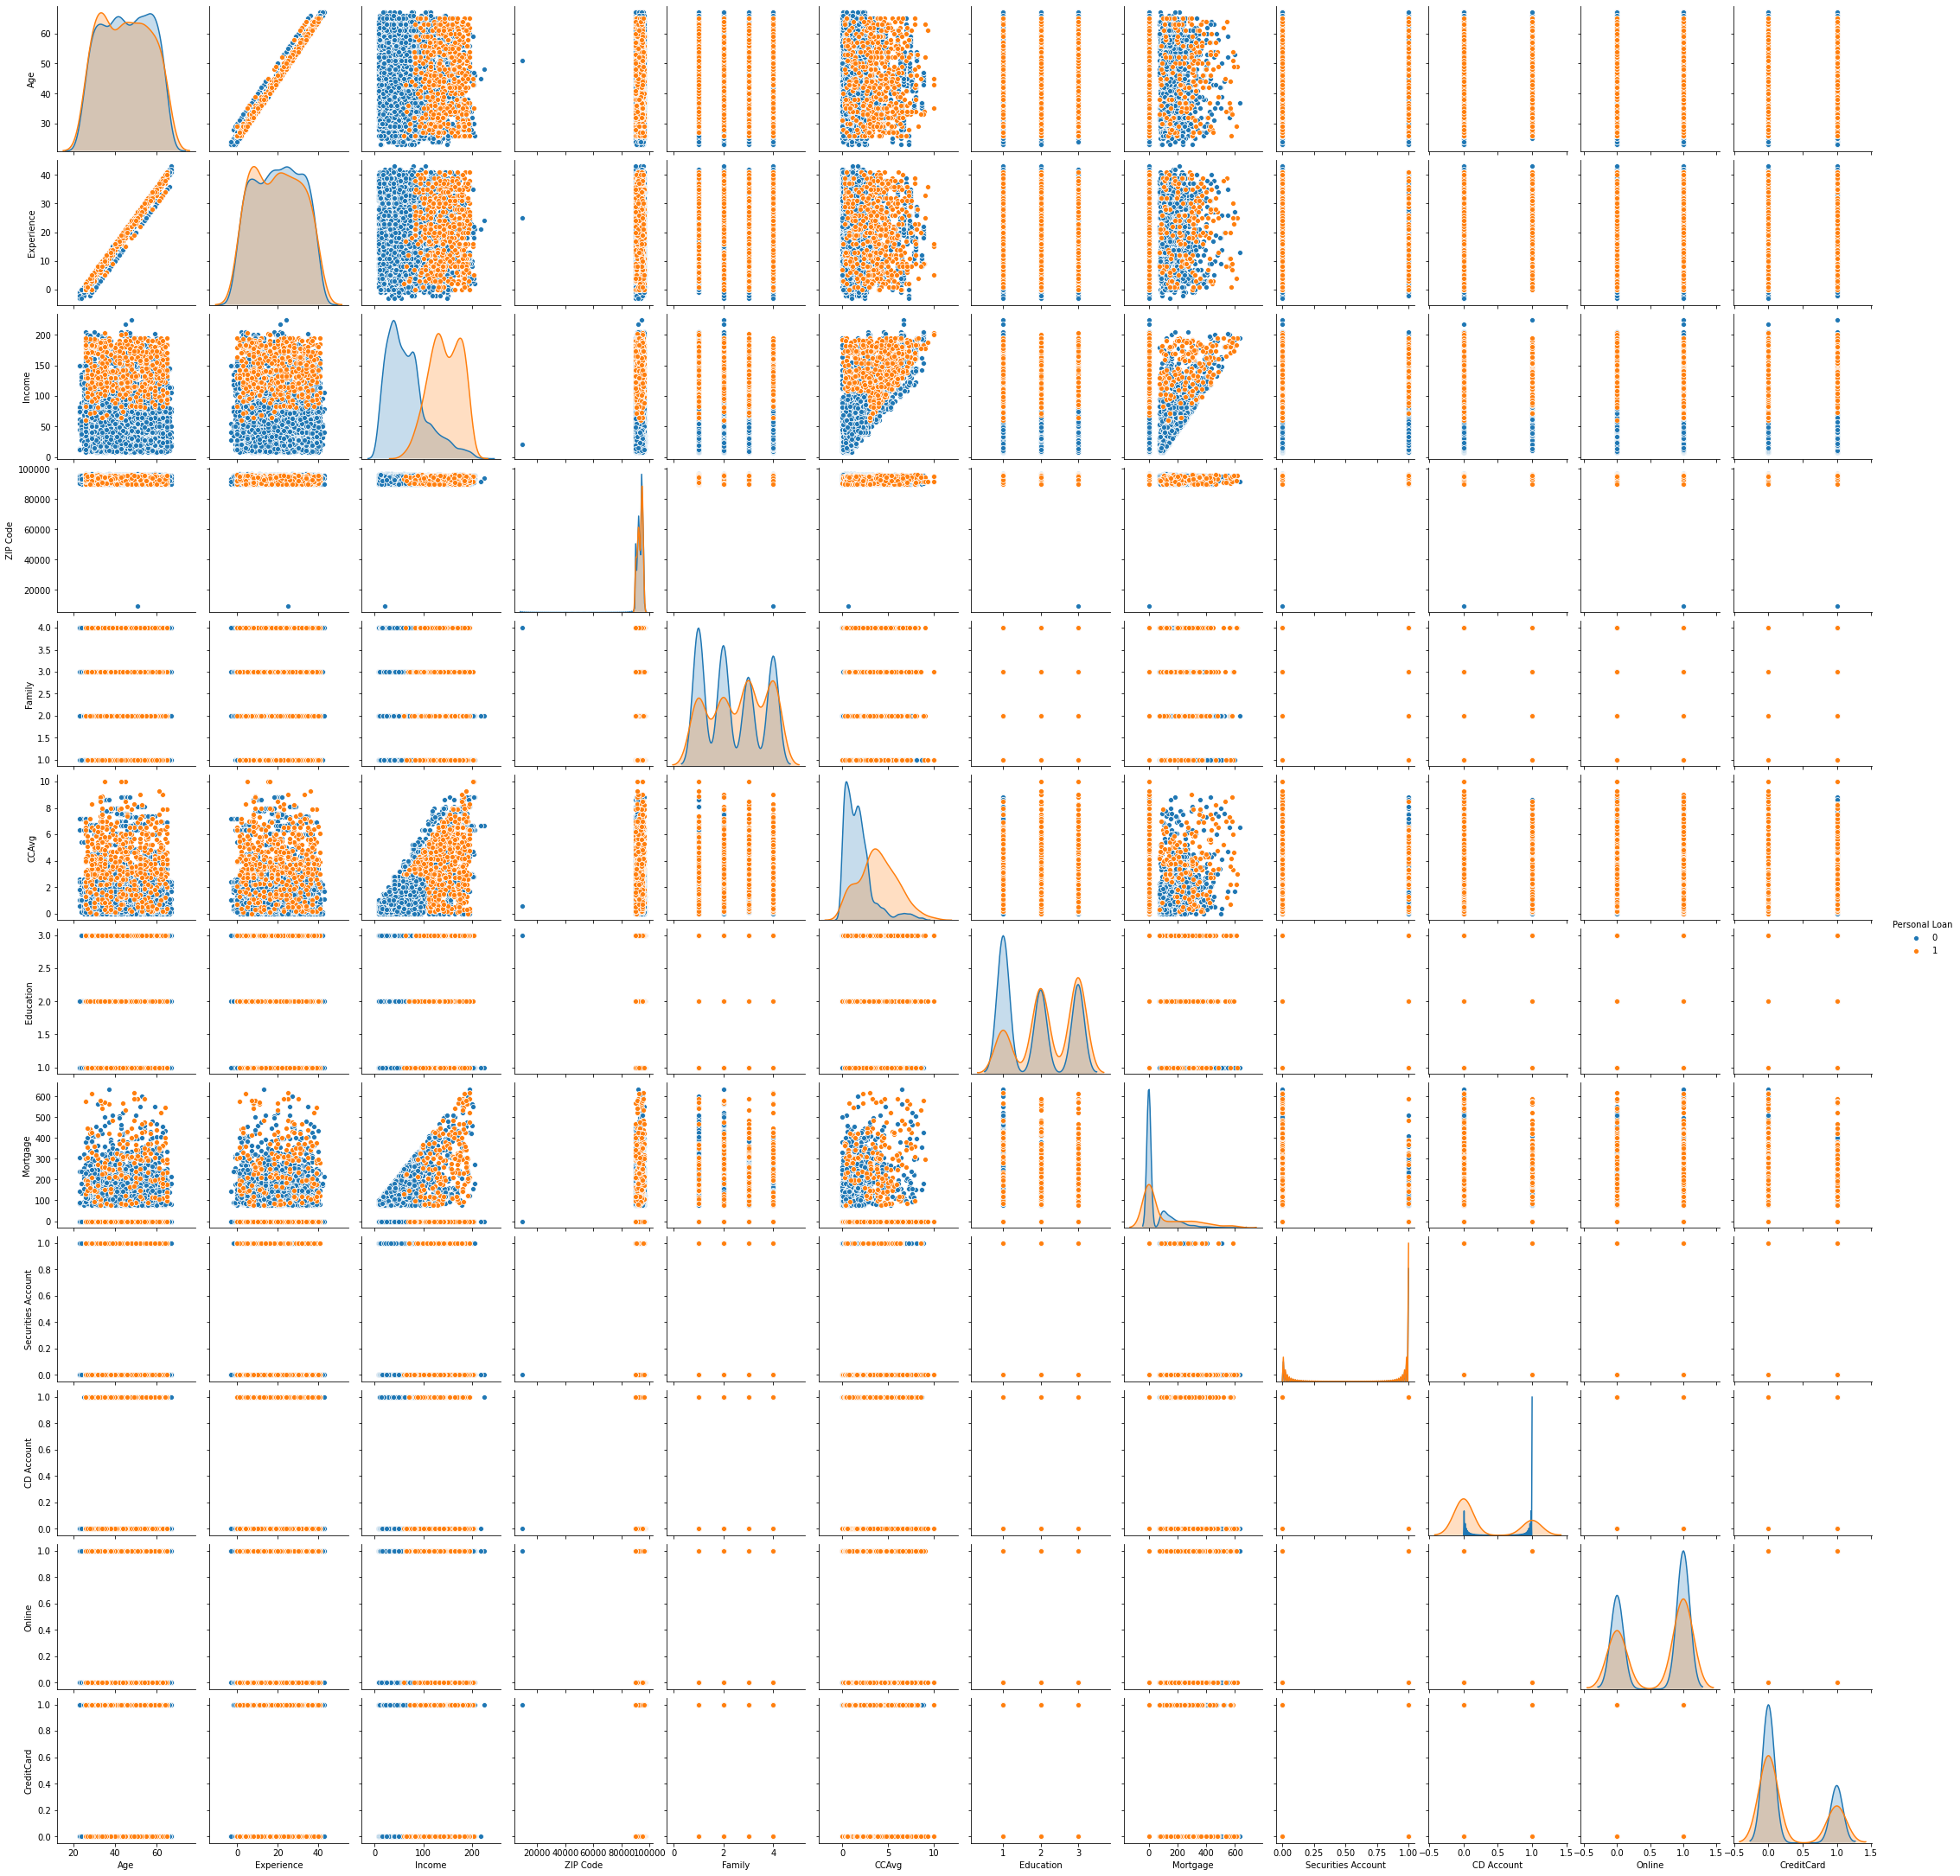

In [ ]:
# Plot figure with size(20,20)
sns.pairplot(Bank_data,diag_kind='kde',hue='Personal Loan')

In [ ]:
Bank_data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* In the experience column there is a negative value(-3).It should be altered.
* In the income column the values are skewed.
* In most of the cases the house is not mortgaged. Hence this can be ignored.
* The zip code is related to particular areas. Hence its not necessary at the moment.
* Above a level of income people have taken Personal Loan, while people with lower income didnt take a personal loan.
* Data of the Personal loans is overlaped with respect to most variables.
*As per given data the number of  people taken Personal Loan is only 480.


In [ ]:
# Experience with less than zero is an error or a wrong data.
Bank_data[Bank_data['Experience']<0].shape

(52, 13)

* Lets take Absolute value of the column Experience fro the dataset.

In [ ]:
Bank_data['Experience']=abs(Bank_data['Experience'])
Bank_data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [ ]:
# print pivot table for mean and median values of age groups.
print(pd.pivot_table(data=Bank_data,index='Personal Loan',values='Age',aggfunc=['mean','median']))

                    mean median
                     Age    Age
Personal Loan                  
0              45.367257     45
1              45.066667     45


In [ ]:
# print pivot table for mean and median values of Experience.
print(pd.pivot_table(data=Bank_data,index='Personal Loan',values='Experience',aggfunc=['mean','median']))

                    mean     median
              Experience Experience
Personal Loan                      
0              20.165487         20
1              19.843750         20


In [ ]:
# print pivot table for mean and median values of Income.
# It shows variations to those who took personal loans and those who do not.
print(pd.pivot_table(data=Bank_data,index='Personal Loan',values='Income',aggfunc=['mean','median']))

                     mean median
                   Income Income
Personal Loan                   
0               66.237389   59.0
1              144.745833  142.5


In [ ]:
# print pivot table for mean and median values of CCAvg.
# Those who took Personal Loan CCAvg is higher.
print(pd.pivot_table(data=Bank_data,index='Personal Loan',values='CCAvg',aggfunc=['mean','median']))

                   mean median
                  CCAvg  CCAvg
Personal Loan                 
0              1.728982    1.4
1              3.905347    3.8


In [ ]:
# print pivot table for mean and median values of Mortgage.
print(pd.pivot_table(data=Bank_data,index='Personal Loan',values='Mortgage',aggfunc=['mean','median']))

                     mean   median
                 Mortgage Mortgage
Personal Loan                     
0               51.789381        0
1              100.845833        0


In [ ]:
# Changing the variable to category type.
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
Bank_data[var]=Bank_data[var].astype('category')

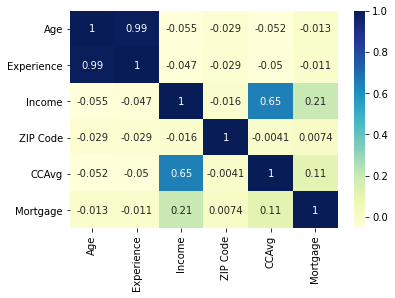

In [ ]:
Bank_Cor=Bank_data.corr()
sns.heatmap(Bank_Cor,cmap="YlGnBu",annot=True)

* As expeccted Experience and Age has high corelation value.
* Income and CCAvg also have great corelation value.

In [ ]:
Bank_data.groupby(['Personal Loan']).agg(['mean','median'])

Age        Experience  ...  CCAvg    Mortgage       
                    mean median       mean  ... median        mean median
Personal Loan                               ...                          
0              45.367257     45  20.165487  ...    1.4   51.789381      0
1              45.066667     45  19.843750  ...    3.8  100.845833      0

[2 rows x 12 columns]

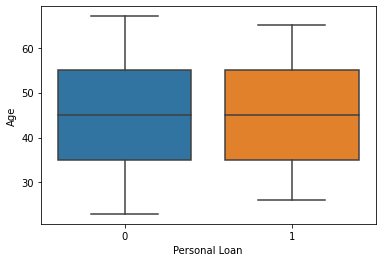

In [ ]:
sns.boxplot(x='Personal Loan',y='Age',data=Bank_data)

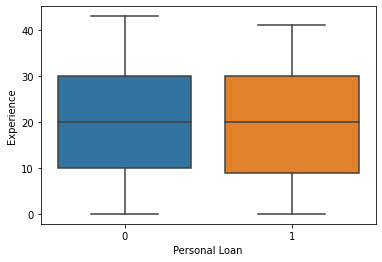

In [ ]:
sns.boxplot(x='Personal Loan',y='Experience',data=Bank_data)

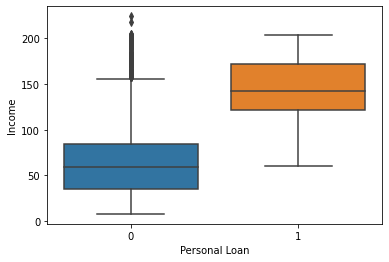

In [ ]:
sns.boxplot(x='Personal Loan',y='Income',data=Bank_data)

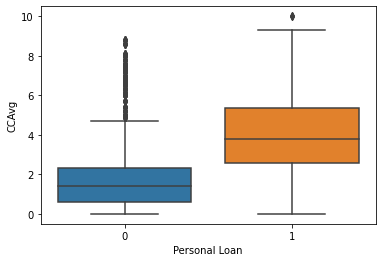

In [ ]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=Bank_data)

In [ ]:
# Creating dummy variables for the column Family.
fam = pd.get_dummies(Bank_data['Family'],prefix='Family')
Bank_data1 = pd.concat([Bank_data,fam],axis=1)        # Adding the result of above statement to the main Dataset.

In [ ]:
# Creating dummy variables for the column Education.
edu = pd.get_dummies(Bank_data['Education'],prefix='Education')
Bank_data1 = pd.concat([Bank_data1,edu],axis=1)        # Adding the result of above statement to the main Dataset.

In [ ]:
# The dummy variables have been created for family and education so lets drop them.
# Bank_data2 is our new dataset after cleaning and transformation.
Bank_data2 = Bank_data1.drop(['Education','Family'],1)

In [ ]:
var = ['Securities Account','CD Account','Online','CreditCard']
Bank_data2[var] = Bank_data2[var].astype('int64')

In [ ]:
Bank_data2_x= Bank_data2.drop(['Personal Loan'], axis=1)
X = Bank_data2.drop(['Personal Loan'],axis=1)
Y = Bank_data2['Personal Loan']

In [ ]:
X.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

# **Split the data into training and test set in the ratio of 70:30 respectively**

In [ ]:
# Test Train Split.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Bank_data2_x,Y, train_size = 0.7,test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Applying scaling to Training set.
scaler = StandardScaler()
X_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg']])
X_test[['Age','Experience','Income','CCAvg']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg']])

# **Implement Logistic Reggression Model**

In [ ]:
# Iteration 1:
import statsmodels.api as sm 
logreg = sm.Logit(Y_train,X_train)
result1 = logreg.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.106272
         Iterations 10
                                   Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.654      
Dependent Variable:       Personal Loan          AIC:                    775.9013   
Date:                     2020-09-01 06:23       BIC:                    874.4696   
No. Observations:         3500                   Log-Likelihood:         -371.95    
Df Model:                 15                     LL-Null:                -1075.0    
Df Residuals:             3484                   LLR p-value:            8.1262e-291
Converged:                1.0000                 Scale:                  1.0000     
No. Iterations:           10.0000                                                   
------------------------------------------------------------------------------------
                    Coef.     Std.Err.      z    P>|z|      [0.025         0.975] 

In [ ]:
# Drop Family_2 and Education_1 in second iteration since the have high P values.
X_train1 = X_train.drop(['Family_2','Education_1'], axis=1) 

In [ ]:
# Iteration 2:
logreg = sm.Logit(Y_train,X_train1)
result2 = logreg.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              786.0617   
Date:                2020-09-01 06:24 BIC:              878.4694   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            14               LL-Null:          -1075.0    
Df Residuals:        3485             LLR p-value:      3.3028e-289
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0389   0.8931  -0.0435 0.9653 -1.7893  1.7116
Experience          0.2218   0.8877   0.

In [ ]:
# Checking for Variance Inflation Factor(VIF) values of feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

,Features,VIF
0,Age,86.35
1,Experience,86.22
3,ZIP Code,7.86
8,Online,2.61
10,Family_1,2.12
12,Family_4,2.05
14,Education_3,1.90
2,Income,1.88
11,Family_3,1.88
13,Education_2,1.79


In [ ]:
# As the VIF value of Age is high and strongly corelated to experience, lets drop Age.
X_train1 = X_train.drop(['Family_2','Education_1','Age'],axis=1)

In [ ]:
# Iteration 3:
logreg = sm.Logit(Y_train,X_train1)
result3 = logreg.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              784.0636   
Date:                2020-09-01 06:24 BIC:              870.3108   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            13               LL-Null:          -1075.0    
Df Residuals:        3486             LLR p-value:      3.1296e-290
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1834   0.0966   1.8990 0.0576 -0.0059  0.3726
Income              3.0115   0.1795  16.

In [ ]:
# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

,Features,VIF
2,ZIP Code,7.75
7,Online,2.61
9,Family_1,2.12
11,Family_4,2.05
1,Income,1.87
10,Family_3,1.87
13,Education_3,1.78
12,Education_2,1.77
3,CCAvg,1.75
8,CreditCard,1.58


In [ ]:
# Mortgage has high P value hence drop Mortgage.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage'],axis=1)

In [ ]:
# Iteration 4:
logreg = sm.Logit(Y_train,X_train1)
result4 = logreg.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.108273
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.647      
Dependent Variable:  Personal Loan    AIC:              783.9091   
Date:                2020-09-01 06:24 BIC:              863.9959   
No. Observations:    3500             Log-Likelihood:   -378.95    
Df Model:            12               LL-Null:          -1075.0    
Df Residuals:        3487             LLR p-value:      7.1039e-291
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1793   0.0964   1.8594 0.0630 -0.0097  0.3683
Income              3.0247   0.1792  16.8

In [ ]:
# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

,Features,VIF
2,ZIP Code,7.39
6,Online,2.61
8,Family_1,2.12
10,Family_4,2.05
9,Family_3,1.87
1,Income,1.83
12,Education_3,1.78
11,Education_2,1.77
3,CCAvg,1.74
7,CreditCard,1.58


In [ ]:
# Zip Code has high VIF value hence drop Zip Code.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code'],axis=1)

In [ ]:
# Iteration 5:
logreg = sm.Logit(Y_train,X_train1)
result5 = logreg.fit()
print(result5.summary2())

Optimization terminated successfully.
         Current function value: 0.239325
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   Personal Loan    AIC:              1699.2745 
Date:                 2020-09-01 06:24 BIC:              1773.2007 
No. Observations:     3500             Log-Likelihood:   -837.64   
Df Model:             11               LL-Null:          -1075.0   
Df Residuals:         3488             LLR p-value:      7.8788e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1087   0.0634   1.7159 0.0862 -0.0155  0.2329
Income              1.2631   0.0811  15.5

In [ ]:
# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

,Features,VIF
5,Online,2.04
1,Income,1.81
2,CCAvg,1.74
9,Family_4,1.59
10,Education_2,1.59
7,Family_1,1.54
11,Education_3,1.54
8,Family_3,1.46
6,CreditCard,1.43
4,CD Account,1.36


In [ ]:
# CCAvg has high P value hence drop CCAvg.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg'],axis=1)

In [ ]:
# Iteration 6:
logreg = sm.Logit(Y_train,X_train1)
result6 = logreg.fit()
print(result6.summary2())

Optimization terminated successfully.
         Current function value: 0.239336
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   Personal Loan    AIC:              1697.3486 
Date:                 2020-09-01 06:24 BIC:              1765.1143 
No. Observations:     3500             Log-Likelihood:   -837.67   
Df Model:             10               LL-Null:          -1075.0   
Df Residuals:         3489             LLR p-value:      1.1543e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1081   0.0633   1.7071 0.0878 -0.0160  0.2321
Income              1.2754   0.0673  18.9

In [ ]:
# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

,Features,VIF
4,Online,2.04
8,Family_4,1.59
9,Education_2,1.59
6,Family_1,1.54
10,Education_3,1.54
7,Family_3,1.46
5,CreditCard,1.43
3,CD Account,1.36
2,Securities Account,1.24
1,Income,1.09


In [ ]:
# Education_2 has high P value hence drop Education_2.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2'],axis=1)

In [ ]:
# Iteration 7:
logreg = sm.Logit(Y_train,X_train1)
result7 = logreg.fit()
print(result7.summary2())

Optimization terminated successfully.
         Current function value: 0.239486
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.220     
Dependent Variable:   Personal Loan    AIC:              1696.4051 
Date:                 2020-09-01 06:24 BIC:              1758.0103 
No. Observations:     3500             Log-Likelihood:   -838.20   
Df Model:             9                LL-Null:          -1075.0   
Df Residuals:         3490             LLR p-value:      2.5961e-96
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1068   0.0633   1.6886 0.0913 -0.0172  0.2309
Income              1.2680   0.0668  18.9

In [ ]:
# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

,Features,VIF
4,Online,1.97
6,Family_1,1.45
8,Family_4,1.44
5,CreditCard,1.42
3,CD Account,1.36
9,Education_3,1.34
7,Family_3,1.31
2,Securities Account,1.23
1,Income,1.07
0,Experience,1.01


In [ ]:
# Education_3 has high P value hence drop Education_3.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2','Education_3'],axis=1)


# Iteration 8:
logreg = sm.Logit(Y_train,X_train1)
result8 = logreg.fit()
print(result8.summary2())

# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

Optimization terminated successfully.
         Current function value: 0.239772
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.219     
Dependent Variable:   Personal Loan    AIC:              1696.4016 
Date:                 2020-09-01 06:24 BIC:              1751.8463 
No. Observations:     3500             Log-Likelihood:   -839.20   
Df Model:             8                LL-Null:          -1075.0   
Df Residuals:         3491             LLR p-value:      8.7449e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1068   0.0633   1.6879 0.0914 -0.0172  0.2308
Income              1.2587   0.0663  18.9

,Features,VIF
4,Online,1.94
5,CreditCard,1.42
8,Family_4,1.39
6,Family_1,1.38
3,CD Account,1.36
7,Family_3,1.28
2,Securities Account,1.23
1,Income,1.07
0,Experience,1.01


In [ ]:
# Experience has high P value hence drop Experience.
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2','Education_3','Experience'],axis=1)


# Iteration 9:
logreg = sm.Logit(Y_train,X_train1)
result9 = logreg.fit()
print(result9.summary2())

# Create a Dataframe which contains the name of all feature variables and their VIF values.
colm = X_train1.columns
VIF = pd.DataFrame()
VIF['Features'] = X_train1[colm].columns
VIF['VIF'] = [variance_inflation_factor(X_train1[colm].values,i)for i in range(X_train1[colm].shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by ="VIF",ascending = False)
VIF

Optimization terminated successfully.
         Current function value: 0.240180
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.218     
Dependent Variable:   Personal Loan    AIC:              1697.2579 
Date:                 2020-09-01 06:24 BIC:              1746.5421 
No. Observations:     3500             Log-Likelihood:   -840.63   
Df Model:             7                LL-Null:          -1075.0   
Df Residuals:         3492             LLR p-value:      4.2152e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              1.2499   0.0659  18.9748 0.0000  1.1208  1.3790
Securities Account -1.7785   0.2647  -6.7

,Features,VIF
3,Online,1.94
4,CreditCard,1.42
7,Family_4,1.39
5,Family_1,1.38
2,CD Account,1.36
6,Family_3,1.28
1,Securities Account,1.23
0,Income,1.06


* Now we select these variables for predicting the people who may tak a personal loan, because these variables are signifivant and has good VIF values.

**Logistic Regression Model Fitting**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg1 = LogisticRegression()
logreg1.fit(X_train1,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Analysing on test data.
X_test1= X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2','Education_3','Experience'],axis=1)
X_test1.columns

Index(['Income', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Family_1', 'Family_3', 'Family_4'],
      dtype='object')

In [ ]:
Y_predict = logreg1.predict(X_test1)
print('Test data accuracy:{:.2f}'.format(logreg1.score(X_test1,Y_test)))

Test data accuracy:0.93


In [ ]:
# Create Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_predict)
print(confusion_matrix)

[[1317   25]
 [  81   77]]


* There are four cases which we need to consider while prediction. They are:

  =>TP(True positive:) In this case we predict yes and they actually take Loan.

  =>TN(True Negative): In this case we predict NO and they actually dont take loan.

  =>FP(False Positive): Here we predict No  and they actually take loan.

  =>FN(False Negative): Here wee predict Yes and the dont take Loan. 
* In our case 

  TP = 77

  TN = 1317

  FP = 25
  
  FN = 81

In [ ]:
TP = 77
TN = 1317
FP = 25
FN = 81
Acc = (TP+TN)/(TP+TN+FN+FP)
print('Test set accuracy:{:.2%}'.format(Acc))

MClassifRate = (FP+FN)/(FP+FN+TP+TN)
print('Misclassification rate:{:.2%}'.format(MClassifRate))

Sensitivity = TP/(FN+TP)
print('Sensitivity:{:.2%}'.format(Sensitivity))

Specificity = TN/(TN+FP)
print('Specificity:{:.2%}'.format(Specificity))

Precision = TP/(FP+TP)
print('Precision:{:.2%}'.format(Precision))


Test set accuracy:92.93%
Misclassification rate:7.07%
Sensitivity:48.73%
Specificity:98.14%
Precision:75.49%


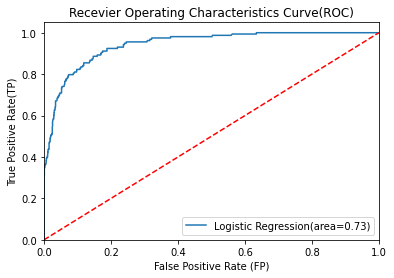

In [ ]:
# Receiver Operating Characteristic curve(ROC) plotting.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg_roc_acc = roc_auc_score(Y_test,logreg1.predict(X_test1))
fpr, tpr, threshold = roc_curve(Y_test,logreg1.predict_proba(X_test1)[:,1])
plt.plot(fpr,tpr,label= 'Logistic Regression(area=%0.2f)'%logreg_roc_acc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (FP)')
plt.ylabel(('True Positive Rate(TP)'))
plt.title('Recevier Operating Characteristics Curve(ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

* Sensitivity value is less than 50% ,which is very low. It may be because of the given data set has only 480 Loan takers from 5000 people.
* Hence more data is needed to increase the sensitivity.
*More the area under ROC the model will be better.
*NOW lets try to improve the sensitivity of the model.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1342
           1       0.75      0.49      0.59       158

    accuracy                           0.93      1500
   macro avg       0.85      0.73      0.78      1500
weighted avg       0.92      0.93      0.92      1500



In [ ]:
Y_predict1 = pd.DataFrame(Y_predict)
Y_predict1.head()

,0
0,0
1,0
2,0
3,0
4,0


# **Applying KNN for classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Applying Scalinf and Splitting.
NNH = KNeighborsClassifier(n_neighbors=5,weights = 'uniform')     #Calling nearest 5 neighbour algorithm.
NNH.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predict the label of test datapoint based on 5 nearest neighbours.
PL_KNN = NNH.predict(X_test)
NNH.score(X_test,Y_test)

0.894

In [ ]:
print(metrics.confusion_matrix(Y_test,PL_KNN))

[[1328   14]
 [ 145   13]]


In [ ]:
# Iteration 1:
X_KNN_train1 = X_train.drop(['Age'],axis=1)
NNH1 = KNeighborsClassifier(n_neighbors= 5,weights= 'uniform')
NNH1.fit(X_train1,Y_train)
X_KNN_test1 = X_test.drop(['Age'],axis=1)
PL_KNN = NNH1.predict(X_test1)
NNH1.score(X_test1,Y_test)
print(metrics.confusion_matrix(Y_test,PL_KNN))

[[1324   18]
 [  68   90]]


* There are four cases which we need to consider while prediction. They are:

  =>TP(True positive:) In this case we predict yes and they actually take Loan.

  =>TN(True Negative): In this case we predict NO and they actually dont take loan.

  =>FP(False Positive): Here we predict No  and they actually take loan.

  =>FN(False Negative): Here wee predict Yes and the dont take Loan. 
* In our case 

  TP = 90

  TN = 1324

  FP = 18
  
  FN = 68

Test set accuracy:94.27%
Misclassification rate:5.73%
Sensitivity:56.96%
Specificity:98.66%
Precision:83.33%


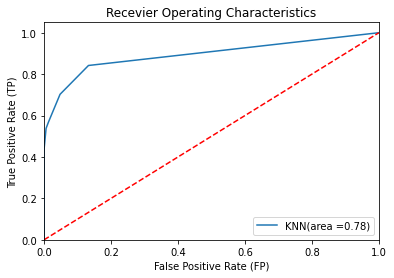

In [ ]:
TP = 90
TN = 1324
FP = 18
FN = 68

Acc = (TP+TN)/(TP+TN+FN+FP)
print('Test set accuracy:{:.2%}'.format(Acc))

MClassifRate = (FP+FN)/(FP+FN+TP+TN)
print('Misclassification rate:{:.2%}'.format(MClassifRate))

Sensitivity = TP/(FN+TP)
print('Sensitivity:{:.2%}'.format(Sensitivity))

Specificity = TN/(TN+FP)
print('Specificity:{:.2%}'.format(Specificity))

Precision = TP/(FP+TP)
print('Precision:{:.2%}'.format(Precision))


# ROC Curve
KNN_ROC_acc = roc_auc_score(Y_test,NNH1.predict(X_test1))
fpr,tpr,threshold = roc_curve(Y_test,NNH1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr,tpr,label ='KNN(area =%0.2f)'%KNN_ROC_acc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (FP)')
plt.ylabel('True Positive Rate (TP)')
plt.title('Recevier Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Iteration 2:
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH2 = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform' )
NNH2.fit(X_train1, Y_train)

PL_KNN = NNH2.predict(X_test1)

NNH2.score(X_test1, Y_test)

print(metrics.confusion_matrix(Y_test, PL_KNN))

[[1330   12]
 [  66   92]]


There are four cases which we need to consider while prediction. They are:

=>TP(True positive:) In this case we predict yes and they actually take Loan.

=>TN(True Negative): In this case we predict NO and they actually dont take loan.

=>FP(False Positive): Here we predict No and they actually take loan.

=>FN(False Negative): Here wee predict Yes and the dont take Loan.

In our case

TP = 92

TN = 1330

FP = 12

FN = 66

Accuracy : 94.27%
MClassifRate: 5.73%
Sensitivity: 56.96%
Specificity: 98.66%
Precision: 83.33%


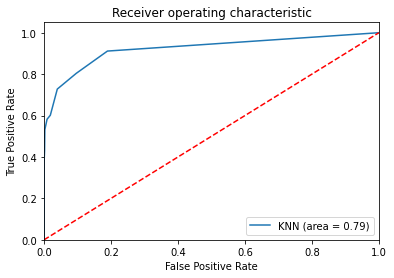

In [ ]:
Acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy : {:.2%}'.format(Acc))


MClassifRate=(FP+FN)/(TP+TN+FP+FN)
print('MClassifRate: {:.2%}'.format(MClassifRate))


Sensitivity=TP/(FN+TP)
print('Sensitivity: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_acc = roc_auc_score(Y_test, NNH2.predict(X_test1))
fpr, tpr, threshold = roc_curve(Y_test, NNH2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_acc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

* Accuracy ofmodel has improved with KNN and n_neighbours as 9, also ROC and AUC have improved

# **Applying Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Iteration 1:

GB1 = GaussianNB()
GB1.fit(X_train, Y_train)
PL_GB = GB1.predict(X_test)

GB1.score(X_test, Y_test)
print(metrics.confusion_matrix(Y_test, PL_GB))



[[1253   89]
 [  56  102]]


There are four cases which we need to consider while prediction. They are:

=>TP(True positive:) In this case we predict yes and they actually take Loan.

=>TN(True Negative): In this case we predict NO and they actually dont take loan.

=>FP(False Positive): Here we predict No and they actually take loan.

=>FN(False Negative): Here wee predict Yes and the dont take Loan.

In our case

TP = 102

TN = 1253

FP = 89

FN = 56

Accuracy of logistic regression classifier on test set: 90.33%
Misclassification Rate: 9.67%
Sensitivity:: 64.56%
Specificity:93.37%
Precision:53.40%


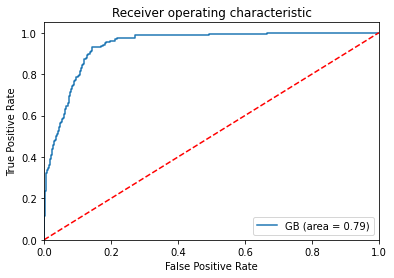

In [ ]:
TP=102
TN=1253
FP=89
FN=56


Acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Acc))

MClassifRate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: {:.2%}'.format(MClassifRate))

Sensitivity=TP/(FN+TP)
print('Sensitivity:: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity:{:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision:{:.2%}'.format(Precision))

#ROC Curve
GB_roc_acc = roc_auc_score(Y_test, GB1.predict(X_test))
fpr, tpr, threshold = roc_curve(Y_test, GB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % GB_roc_acc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Iteration 2:

X_train1=X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],1)
X_test1= X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],axis=1)

GB2 = GaussianNB()
GB2.fit(X_train1, Y_train)
PL_GB = GB2.predict(X_test1)

GB2.score(X_test1, Y_test)
print(metrics.confusion_matrix(Y_test, PL_GB))


[[1270   72]
 [  86   72]]


There are four cases which we need to consider while prediction. They are:

=>TP(True positive:) In this case we predict yes and they actually take Loan.

=>TN(True Negative): In this case we predict NO and they actually dont take loan.

=>FP(False Positive): Here we predict No and they actually take loan.

=>FN(False Negative): Here wee predict Yes and the dont take Loan.

In our case

TP = 72

TN = 1270

FP = 72

FN = 86

Accuracy : 89.47%
Misclassification Rate: 10.53%
Sensitivity: 45.57%
Specificity: 94.63%
Precision: 50.00%


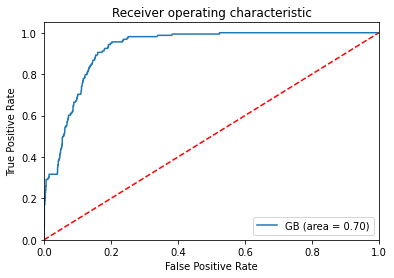

In [ ]:
TP = 72
TN = 1270
FP = 72
FN = 86

Acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy : {:.2%}'.format(Acc))

MClassifRate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: {:.2%}'.format(MClassifRate))


Sensitivity=TP/(FN+TP)
print('Sensitivity: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: {:.2%}'.format(Precision))

#ROC Curve
GB_roc_acc = roc_auc_score(Y_test, GB2.predict(X_test1))
fpr, tpr, threshold = roc_curve(Y_test, GB2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % GB_roc_acc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

**The test results of diffrent models are shown below**


        Logistic Accuracy of logistic regression classifier on test set:            92.93%		 
        Misclassification Rate:It is often wrong:                           7.07%		     [[1317   25]
	    Sensitivity: When its actually yes how often it predicts yes:      48.73%             [  81   77]]
        Specificity: When its actually no, how often does it predict no:   98.14%
        Precision: When it predicts yes, how often is it correct:          75.49%


KNN	   
               
        Accuracy of logistic regression classifier on test set:            94.80%		 
	    Misclassification Rate: It is often wrong:                          5.20%		  [[1330   12]
	    Sensitivity: When its actually yes how often it predicts yes:      58.23%          [  66   92]]
        Specificity: When its actually no, how often does it predict no:   99.11%
	    Precision: When it predicts yes, how often is it correct:          88.46%
	
Gaussian Naive Bayes	 
          
       Accuracy of logistic regression classifier on test set:            90.33%		 
	   Misclassification Rate: It is often wrong:                          9.67%		  [[1253   89]
	   Sensitivity: When its actually yes how often it predicts yes:      64.56%          [  56  102]]
	   Specificity: When its actually no, how often does it predict no:   93.37%
       Precision: When it predicts yes, how often is it correct:          53.40%

# **Conclusion:**

**KNN** model performs the best, evident from above results. However, Sensitivity is greater in **Gaussian Naive Bayes**.
The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
true picture of market i.e. person who took loan are on lower side.
If we apply the model and change our approach and target only those predicted as yes first, it is 88% (Precision)
chance they will take loan. Hence our chances that a person takes personal loan increases.
Though our Sensitivity is around 58% still we end up offering more loans at end of program